In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

In [10]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [12]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


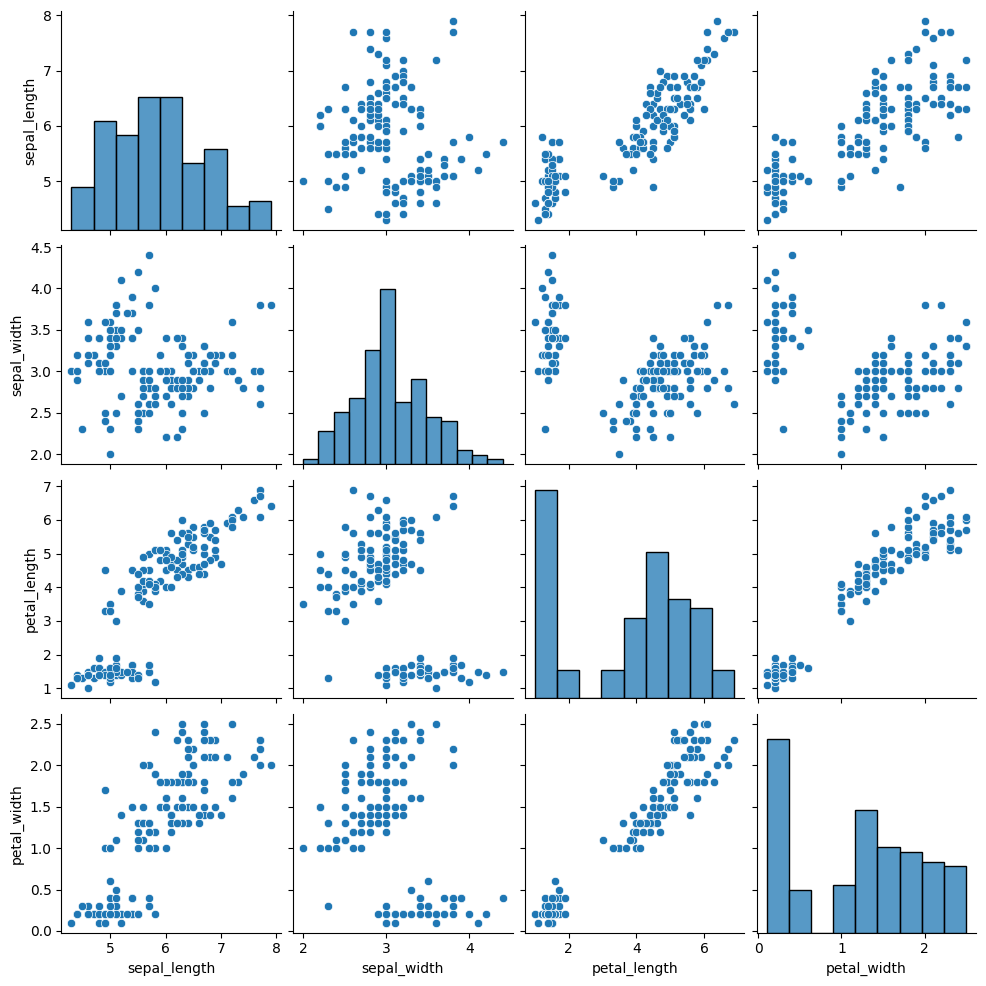

In [14]:
sns.pairplot(df)

In [15]:
Z = df.copy()

In [16]:
X = Z.drop("species", axis = 1)

In [17]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
X.shape

(150, 4)

In [20]:
from sklearn.cluster import KMeans

In [22]:
K_means_model = KMeans(n_clusters = 5, random_state = 42) ##n_init defoult = 10 -> iteration -> centroidleri ayırır en iyi ayrışım sonucunu verir. 

In [23]:
K_means_model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3], dtype=int32)

In [25]:
#K_means_model.fit(X)
#K_means_model.predict(X) #yeni data geldiğinde kullanılacak

In [27]:
X["Classes"] = K_means_model.labels_
X

,sepal_length,sepal_width,petal_length,petal_width,Classes
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,4


In [30]:
#from pyclustertend import hopkins

In [33]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]
# normalde bu fonksiyonumuz pyclustertend'ın hopkins kütüphanesinde var. Ancak oluşabilecek hatalara karşı
# doğrudan fonksiyonun kendisini kullanacağız. Bundan dolayı pyclustertend'ı install etmemize gerek yoktur!
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

In [37]:
X = X.drop("Classes", axis = 1)

In [38]:
X.shape

(150, 4)

In [45]:
hopkins(X, X.shape[0])  #0 ''a yakınsamak ister, more than 0.5 is should not be accepted. It used to uderstand if data is convinient for the clustering

0.17042183632729443

In [46]:
# X ["Classes"] = K_means_model.labels_

In [47]:
hopkins(X, 60)

0.19511947233835775

## Elbow Method

In [49]:
ssd = []

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(X)
    ssd.append(model.inertia_)

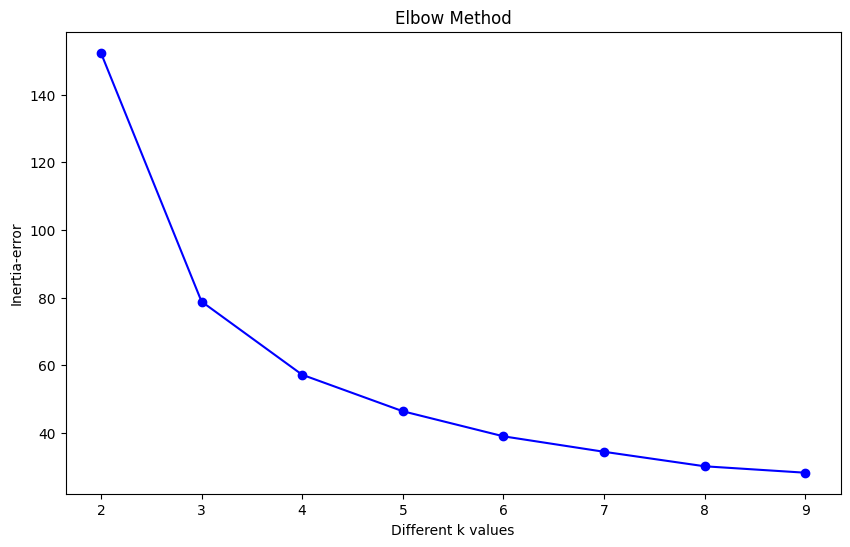

In [53]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("Inertia-error")
plt.title("Elbow Method");   #The max sharpest and first move is optimal

In [54]:
ssd

[152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.469495898838005,
 30.186555194805194,
 28.28937085137085]

In [55]:
pd.Series(ssd).diff()

0          NaN
1   -73.496510
2   -21.622968
3   -10.782291
4    -7.406195
5    -4.570491
6    -4.282941
7    -1.897184
dtype: float64

In [56]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)

In [57]:
df_diff

,0
1,NaN
2,73.496510
3,21.622968
4,10.782291
5,7.406195
6,4.570491
7,4.282941
8,1.897184


In [90]:
df_diff.plot(kind = 'bar')

AttributeError: 'DataFrame' object has no attribute '_convert'

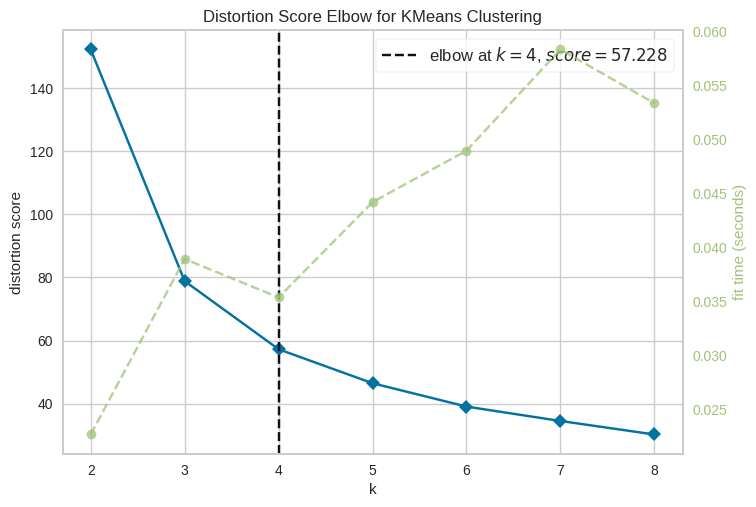

In [68]:
from yellowbrick.cluster import KElbowVisualizer
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

## Silluette Analysis

In [69]:
from sklearn.metrics import silhouette_score

In [72]:
range_n_clusters = range(2,9)

for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6810461692117465
For n_clusters=3, the silhouette score is 0.5528190123564102
For n_clusters=4, the silhouette score is 0.49805050499728815
For n_clusters=5, the silhouette score is 0.48874888709310654
For n_clusters=6, the silhouette score is 0.36483400396700366
For n_clusters=7, the silhouette score is 0.34974816211612186
For n_clusters=8, the silhouette score is 0.3574536925852728


In [84]:
##Cluster is better to be to close to 1, With Inertia Analysis that's why it's used to get optimal clusters.
## Siluette->  One aglomeration how similar to own group 

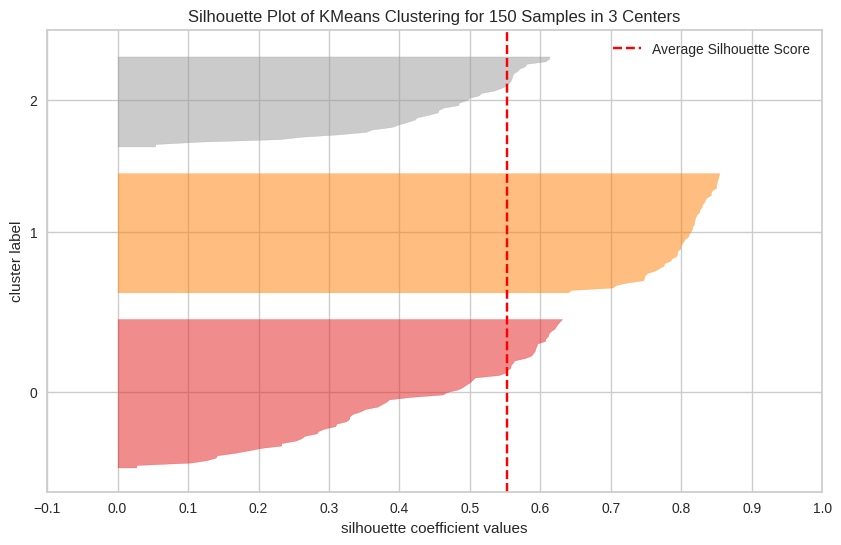

In [85]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

In [91]:
model = KMeans(n_clusters = 3, random_state = 42)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [92]:
cluster = model.labels_

In [93]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [94]:
X["predicted_clusters"] = cluster

In [95]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [96]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [97]:
df["predicted_clusters"] = cluster

In [98]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [99]:
ct = pd.crosstab(df.predicted_clusters, df.species)
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


## Adjust Rand Score

In [101]:
from sklearn.metrics import adjusted_rand_score